<a href="https://colab.research.google.com/github/fabiors777/Acidentes_nas_BRs/blob/main/Acidentes_nas_BRs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (40,20)
pd.set_option('max_colwidth', None)
pd.set_option('max_columns', 50)
pd.set_option('display.width', 999)

# Fazendo a leitura da base de dados

In [ ]:
df1 = pd.read_excel ('/content/drive/MyDrive/Colab_Notebooks/acidentes_brasil_2010_2020.xlsx',sheet_name=0 )
df2 = pd.read_excel ('/content/drive/MyDrive/Colab_Notebooks/acidentes_brasil_2010_2020.xlsx',sheet_name=1 )


Analisar base de dados

In [ ]:
display(df1.head())
print(df1.shape)

In [ ]:
display(df2.head())
print(df2.shape)

In [ ]:
df = df1.append(df2)
display(df.head())
print(df.shape)

In [ ]:
print(df.describe())

##Separando dados de interesse

In [ ]:
br163 = df.loc[df['br']==163,['br','municipio', 'causa_acidente','tipo_acidente','sentido_via']]
print(br163)

##Criando dataframe com os dados de interesse

In [ ]:
df_area_estudo = br163.loc[br163['municipio'].isin(['DIONISIO CERQUEIRA','GUARUJA DO SUL','SAO JOSE DO CEDRO', 'GUARACIABA'])].copy()
#df_trecho = trecho_br163.copy()
print(df_area_estudo.head())


##Criando gráficos

Principais causas de acidentes

In [ ]:
contagem_causa_original = df_area_estudo['causa_acidente'].value_counts()
print(contagem_causa_original)
#df_contagem_causa = df_area_estudo['causa_acidente'].value_counts().copy()
#df_contagem_causa = df_area_estudo['causa_acidente'].value_counts().to_frame().reset_index()
#df_contagem_causa.rename(columns={'index' :'causa', 'causa_acidente': 'quantidade'}, inplace=True)
#print(df_contagem_causa)

Arrumando legenda

In [ ]:
df_area_estudo.loc[df_area_estudo['causa_acidente'] == 'Ingestão de Álcool'] = 'Ingestão de álcool e/ou substâncias psicoativas'
df_area_estudo.loc[df_area_estudo['causa_acidente'] == 'Ingestão de álcool'] = 'Ingestão de álcool e/ou substâncias psicoativas'
df_area_estudo.loc[df_area_estudo['causa_acidente'] == 'Ingestão de álcool e/ou substâncias psicoativas pelo pedestre'] = 'Ingestão de álcool e/ou substâncias psicoativas'
df_area_estudo.loc[df_area_estudo['causa_acidente'] == 'Falta de Atenção à Condução'] = 'Falta de atenção à condução'
df_area_estudo.loc[df_area_estudo['causa_acidente'] == 'Defeito mecânico em veículo'] = 'Defeito mecânico no veículo'
df_area_estudo.loc[df_area_estudo['causa_acidente'] == 'Dormindo'] = 'Condutor dormindo'
df_area_estudo.loc[df_area_estudo['causa_acidente'] == 'Animais na Pista'] = 'Animais na pista'
df_area_estudo.loc[df_area_estudo['causa_acidente'] == 'Falta de atenção à condução'] = 'Falta de atenção'
df_area_estudo.loc[df_area_estudo['causa_acidente'] == 'Defeito na Via'] = 'Defeito na via'
df_area_estudo.loc[df_area_estudo['causa_acidente'] == 'Desobediência às normas de trânsito pelo condutor'] = 'Desobediência à sinalização'
df_contagem_causa_arrumada = df_area_estudo['causa_acidente'].value_counts().copy()
df_contagem_causa_arrumada = df_area_estudo['causa_acidente'].value_counts().to_frame().reset_index()
df_contagem_causa_arrumada.rename(columns={'index' :'causa', 'causa_acidente': 'quantidade','fator': 'fator'}, inplace=True)
df_contagem_causa_arrumada['fator']=""
#if df_contagem_causa_arrumada['causa']==['Falta de atenção', 'Velocidade incompatível', 'Não guardar distância de segurança']:
#  df_contagem_causa_arrumada['fator']='Falha humana'
  
print(df_contagem_causa_arrumada)

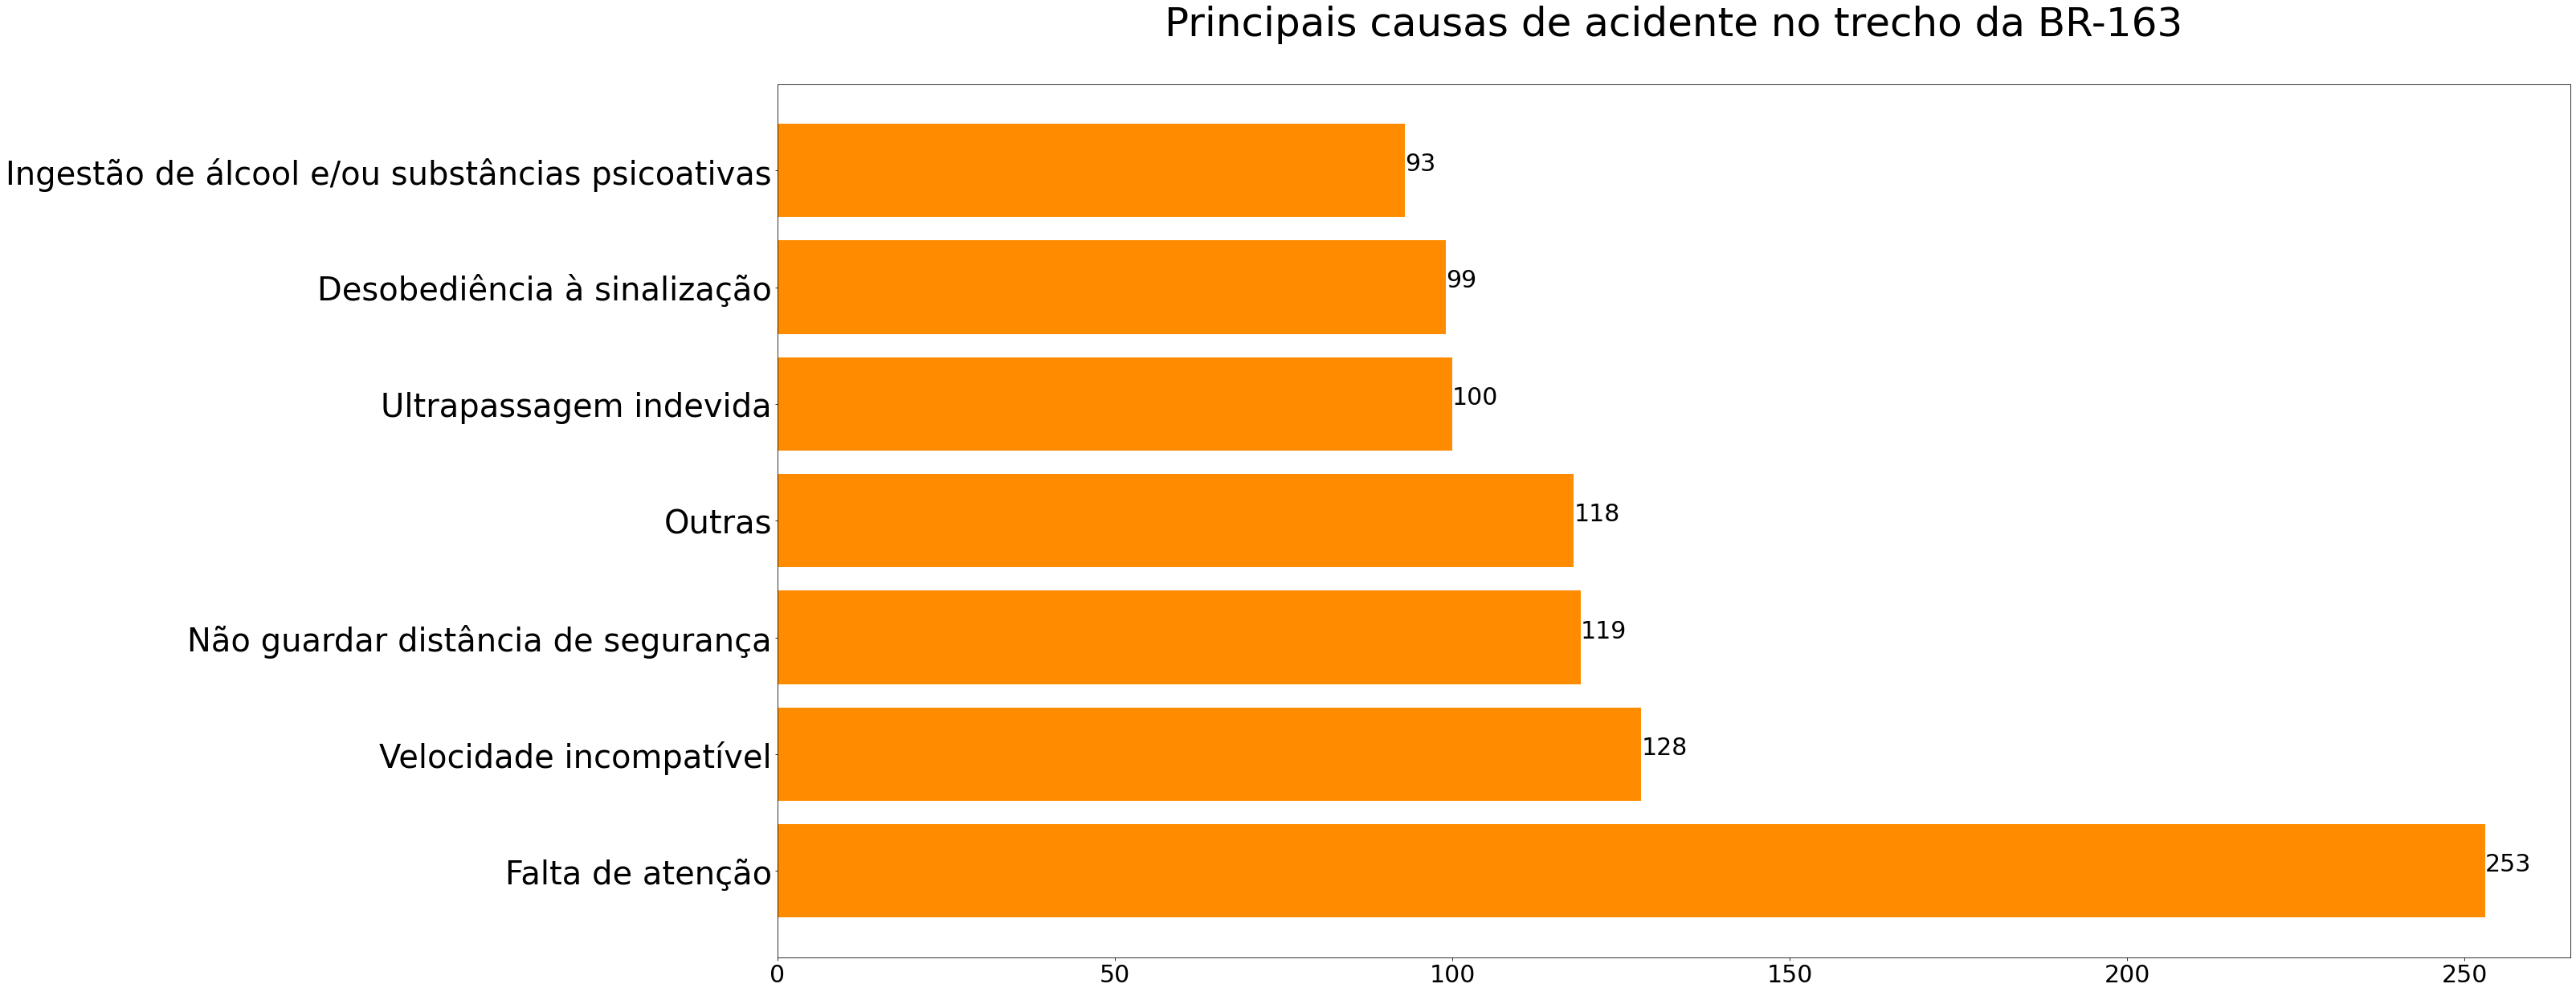

In [ ]:
#Criando grafico 1
graph1 = df_contagem_causa_arrumada.sort_values(by='quantidade', ascending=False).head(7)
y = graph1['causa']
x = graph1['quantidade']
plt.barh(y, x, color='#FF8C00')
plt.title('Principais causas de acidente no trecho da BR-163', y=1.05, fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

for index, value in enumerate(x):
  plt.text(value, index, str(value), fontsize=30)
plt.savefig('grafico_causas_acidentes.png', dpi = 600, bbox_inches = 'tight')

In [ ]:
df_area_estudo['fator'] = ""

df_area_estudo.loc[(df_area_estudo['causa_acidente']=='Falta de atenção')|
                               (df_area_estudo['causa_acidente']=='Velocidade incompatível')|
                               (df_area_estudo['causa_acidente']=='Não guardar distância de segurança')|
                               (df_area_estudo['causa_acidente']=='Ultrapassagem indevida')|
                               (df_area_estudo['causa_acidente']=='Ingestão de álcoolo')|
                               (df_area_estudo['causa_acidente']=='Desobediência à sinalização')|
                               (df_area_estudo['causa_acidente']=='Condutor dormindo')|
                               (df_area_estudo['causa_acidente']=='Desobediência às normas de trânsito pelo condutor')|
                               (df_area_estudo['causa_acidente']=='Velocidade Incompatível')|
                               (df_area_estudo['causa_acidente']=='Ultrapassagem Indevida')|
                               (df_area_estudo['causa_acidente']=='Falta de atenção do pedestre')|
                               (df_area_estudo['causa_acidente']=='Ingestão de álcool e/ou substâncias psicoativas')|
                               (df_area_estudo['causa_acidente']=='Carga excessiva e/ou mal acondicionada')|
                               (df_area_estudo['causa_acidente']=='Mal súbito'), 'fator'] = 'Falha humana'

df_area_estudo.loc[(df_area_estudo['causa_acidente']=='Defeito mecânico no veículo')|
                               (df_area_estudo['causa_acidente']=='Deficiência ou não acionamento do sistema de iluminação/sinalização do veículo')|
                               (df_area_estudo['causa_acidente']=='Avarias e/ou desgaste excessivo no pneu'), 'fator'] = 'Falta de manutenção'

df_area_estudo.loc[(df_area_estudo['causa_acidente']=='Defeito na via')|
                               (df_area_estudo['causa_acidente']=='Pista escorregadia')|
                               (df_area_estudo['causa_acidente']=='Objeto estático sobre o leito carroçável')|
                               (df_area_estudo['causa_acidente']=='Sinalização da via insuficiente ou inadequada'), 'fator'] = 'Problemas na rodovia'

df_area_estudo.loc[(df_area_estudo['causa_acidente']=='Outras')|
                               (df_area_estudo['causa_acidente']=='Animais na pista'), 'fator'] = 'Outros'

df_area_estudo.loc[(df_area_estudo['causa_acidente']=='Restrição de visibilidade')|
                               (df_area_estudo['causa_acidente']=='Agressão externa'), 'fator'] = 'Fatores externos'

df_contagem_causa_arrumada = df_area_estudo['causa_acidente'].value_counts().copy()
df_contagem_causa_arrumada = df_area_estudo['causa_acidente'].value_counts().to_frame().reset_index()
df_contagem_causa_arrumada.rename(columns={'index' :'causa', 'causa_acidente': 'quantidade','fator': 'fator'}, inplace=True)

print(df_area_estudo)

                                                     br                                        municipio                                   causa_acidente                                    tipo_acidente                                      sentido_via             fator
2013                                                163                                SAO JOSE DO CEDRO               Não guardar distância de segurança                                 Colisão traseira                                      Decrescente      Falha humana
4454                                  Condutor dormindo                                Condutor dormindo                                Condutor dormindo                                Condutor dormindo                                Condutor dormindo      Falha humana
14305                                               163                                       GUARACIABA                      Desobediência à sinalização                              Colisão

In [ ]:
df_contagem_fator = df_area_estudo['fator'].value_counts(normalize=True).copy()
df_contagem_fator = df_area_estudo['fator'].value_counts(normalize=True).mul(100).round(1).to_frame().reset_index()
df_contagem_fator.rename(columns={'index' :'fator', 'fator': 'quantidade'}, inplace=True)
#df_contagem_fator['quantidade']=df_contagem_fator['quantidade']*100
print(df_contagem_fator)

                  fator  quantidade
0          Falha humana        80.3
1                Outros        11.7
2  Problemas na rodovia         5.2
3   Falta de manutenção         2.6
4      Fatores externos         0.3


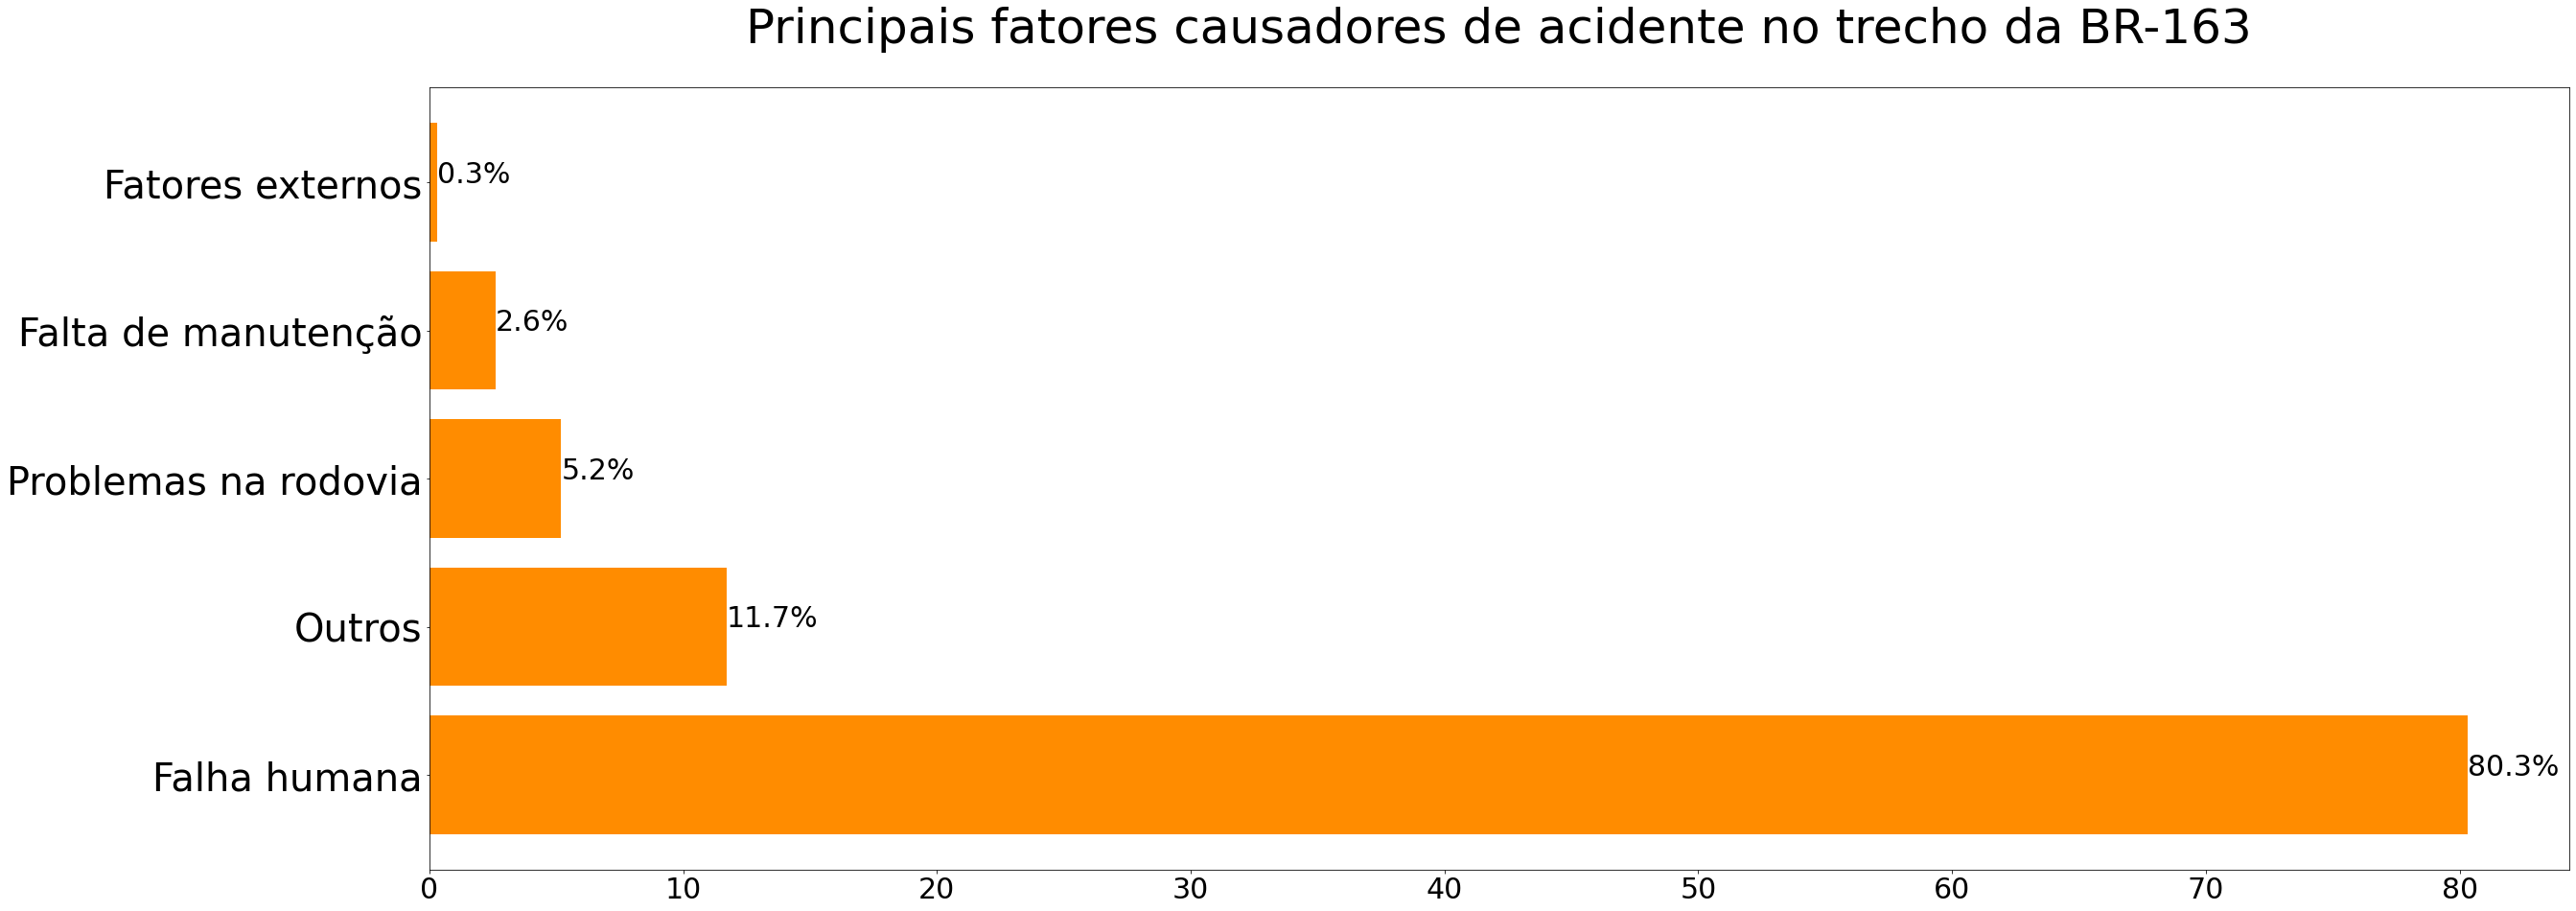

In [ ]:
#Criando o grafico 2
graph2 = df_contagem_fator.sort_values(by='quantidade', ascending=False).head(7)
y = graph2['fator']
x = graph2['quantidade']
plt.barh(y, x, color='#FF8C00')
plt.title('Principais fatores causadores de acidente no trecho da BR-163', y=1.05, fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)
for index, value in enumerate(x):
  plt.text(value, index, str(value)+'%', fontsize=30)

plt.savefig('grafico_fator_acidentes.png', dpi = 600, bbox_inches = 'tight')